In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time



def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")
    
    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [3]:
pip install --upgrade jinja2>=3.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Start a webdriver instance and navigate to the webpage
driver = webdriver.Edge()
driver.get('https://fantasy.premierleague.com/statistics')
time.sleep(5)
cookies = driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[1]/div[5]/button[1]')

cookies.click()
per_page = 30
last_page = 8


def convert_to_english(text):
    # Create a mapping from the non-English characters to the corresponding English alphabet letters
    mapping = {
        'Á': 'A',
        'Š': 'S',
        'ą': 'a',
        'ć': 'c',
        'ę': 'e',
        'ł': 'l',
        'ń': 'n',
        'ó': 'o',
        'ś': 's',
        'ź': 'z',
        'ż': 'z',
        'É': 'E',
        'é': 'e',
        'š': 's',
        'ã': 'a',
        'ï': 'i',
        '©': ' e',
        'ü': 'u',
        'ğ': 'g',
        '¼': 'u',
        '°': 'i',
        'o': 'o',
        'ִ�': 'g',
        'č': 'c',
        'í': 'i',
        'ú': 'u'
    }
    
    # Initialize an empty result string
    result = ""

    # Iterate through each character in the text
    for char in text:
        # If the character is in the mapping, use the corresponding English alphabet letter
        if char in mapping:
            result += mapping[char]
        # Otherwise, just use the character as is
        else:
            result += char

    # Return the converted text
    return result.lower()

before_path = '//*[@id="root"]/div[2]/div/div[1]/table/tbody/tr['
after_path = ']/td[2]/button/div/div[2]/div[1]'
before_path_price = '//*[@id="root"]/div[2]/div/div[1]/table/tbody/tr['
after_path_price = ']/td[3]'
players_prices = {}
for j in range(23):
    for i in range(per_page):
        try:
            player_name = driver.find_element(By.XPATH, before_path + str(i + 1) + after_path).text
            players_prices[convert_to_english(player_name)] = driver.find_element(By.XPATH, before_path_price + str(
                i + 1) + after_path_price).text

        except:
            continue
    if j < 22:
        cell = driver.find_element(By.XPATH, '//*[@id="root"]/div[2]/div/div[1]/div[3]/button[3]')
        cell.click()

driver.get('https://fbref.com/en/comps/9/Premier-League-Stats')

# Find the table element

table = driver.find_element(By.ID, "div_results2022-202391_overall")
before_XPath = "//*[@id='results2022-202391_overall']/tbody/tr["
before_XPath_team = "//*[@id='stats_standard_9']/tbody/tr["

aftertd_XPath = "]/td["
aftertr_XPath = "]"
num_rows = len(table.find_elements(By.XPATH, "//*[@id='results2022-202391_overall']/tbody/tr"))

In [5]:
def goalkeeper_calculate_points(pos, minutes, ga, saves, pkatt, pka, pksv):
    points = 0
    if pos == "GK":
        points += (minutes // 60)+1
        points += (ga//2) * -1
        if ga == 0:
            points += 4
        points += saves // 3
        points += pksv * 5
        points += (pkatt - pk) * -2
    return points


def calculate_points(pos, minutes, gls, ast,  pk,pkatt,crdy, crdr, ga):
    points = 0
    if pos == "DF":
        points += (minutes // 60)+1
        points += gls * 6
        points += ast * 3
        points += crdy * -1
        points += crdr * -3
        points += (ga//2) * -1
        if ga == 0:
            points += 4
        points += (pkatt - pk) * -2
    elif pos == "MD":
        points += (min // 60)+1
        points += gls * 5
        points += ast * 3
        points += crdy * -1
        points += crdr * -3
        if ga == 0:
            points += 1
        points += (pkatt - pk) * -2
    elif pos == "FW":
        points += (min // 60)+1
        points += gls * 4
        points += ast * 3
        points += crdy * -1
        points += crdr * -3
        points += (pkatt - pk) * -2
    return points


In [6]:
import numpy as np
class Players:
    def __init__(self):
        self.players = {}
        self.features_names_GK = []
        self.features_names_all = []
        # self.name = name
        # self.team_name = team_name
        # self.pos = pos
        # self.price = price
        # self.code = code

    def add_player(self, name, team_name, pos, price, code):
        self.players[name] = [team_name, pos, price, code]
    
    def add_point(self,name,teams):
        pos = self.players[name][1]
        games = self.get_recent_games(player_name,teams)
        if len(self.players[name]) == 4:
            if sum(games) == 0:
                self.players[name].append(-1)
                return
            if pos == 'GK':
                self.players[name].append(gk_clf.predict(np.array(games).reshape(1, -1))[0])
            else:
                self.players[name].append(players_clf.predict(np.array(games).reshape(1, -1))[0])
                
        else:
            if sum(games) == 0:
                self.players[name][4] = -1
                return
            if pos == 'GK':
                self.players[name][4] = gk_clf.predict(np.array(games).reshape(1, -1)[0])
            else:
                self.players[name][4] =players_clf.predict(np.array(games).reshape(1, -1))

    def get_recent_games(self, name, teams):
        team_name, pos, price, code = self.players[name]
        if pos != 'GK':
            page = 'https://fbref.com/en/players/' + str(code) + '/matchlogs/2022-2023/summary/Match-Logs'
        else:
            page = 'https://fbref.com/en/players/' + str(code) + '/matchlogs/2022-2023/keeper'
        driver.get(page)
        match_len = len(driver.find_elements(By.XPATH, "//*[@id='matchlogs_all']/tbody/tr"))
        before = lambda x: '//*[@id="matchlogs_all"]/tbody/tr[' + str(x) + ']/td['
        start = 10

        after = ']'
        number_of_games = 0
        i = match_len
        while number_of_games < 5 and i >= 3:
            if pos != 'GK':
                stats = [0] * 24
                try:
                    org = driver.find_element(By.XPATH, before(i) + str(2) + after + '/a').text
                    if org != '' and org == 'Premier League':
                        stats[0] = teams.__getitem__(team_name)[1] / 5
                        stats[1] = \
                            teams.__getitem__(driver.find_element(By.XPATH, before(i) + str(7) + after + '/a').text)[
                                1] / 5

                        score = driver.find_element(By.XPATH, before(i) + str(5) + after).text.split(' ')[1].split('–')
                        if driver.find_element(By.XPATH, before(i) + str(4) + after).text == 'Home':
                            stats[2] = float(score[0]) / 5
                        else:
                            stats[2] = float(score[1]) / 5
                        for j in range(start, start + 13):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[3 + j - start] += float(cur) / 5

                        for j in range(26, 34):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[j - 10] += float(cur) / 5
                        number_of_games += 1


                except:
                    pass
            else:
                stats = [0] * 26
                try:
                    org = driver.find_element(By.XPATH, before(i) + str(2) + after).text
                    if org != '' and org == 'Premier League':
                        stats[0] = teams.__getitem__(team_name)[1]
                        stats[1] = \
                            teams.__getitem__(driver.find_element(By.XPATH, before(i) + str(7) + after + '/a').text)[1]

                        for j in range(start, start + 24):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[2 + j - start] += float(cur) / 5

                    number_of_games += 1
                except:
                    pass
            i -= 1
        driver.get('https://fbref.com/en/squads/' + teams.__getitem__(team_name)[0])
        if number_of_games < 5:
            if pos != 'GK':
                stats = [0] * 24
            else:
                stats = [0] * 26
            
        return stats

    def add_games(self, name, games):
        team_name, pos, price, code = self.players[name]
        features_names = []
        if pos != 'GK':
            page = 'https://fbref.com/en/players/' + str(code) + '/matchlogs/2022-2023/summary/Match-Logs'
        else:
            page = 'https://fbref.com/en/players/' + str(code) + '/matchlogs/2022-2023/keeper'
        driver.get(page)
        match_len = len(driver.find_elements(By.XPATH, "//*[@id='matchlogs_all']/tbody/tr"))
        before = lambda x: '//*[@id="matchlogs_all"]/tbody/tr[' + str(x) + ']/td['
        before_head = lambda x: '//*[@id="matchlogs_all"]/thead/tr[' + str(x) + ']/th['

        start = 10

        after = ']'
        number_of_games = 0
        i = match_len
        starting = len(games)
        while i != 0:
            if pos != 'GK':
                stats = [0] * 25
                try:
                    org = driver.find_element(By.XPATH, before(i) + str(2) + after + '/a').text
                    if org != '' and org == 'Premier League':
                        stats[0] = teams.__getitem__(team_name)[1]
                        stats[1] = \
                        teams.__getitem__(driver.find_element(By.XPATH, before(i) + str(7) + after + '/a').text)[1]
                        if len(games) == 0:
                            features_names.append('T_Rank')
                            features_names.append('O_Rank')
                        score = driver.find_element(By.XPATH, before(i) + str(5) + after).text.split(' ')[1].split('–')
                        if driver.find_element(By.XPATH, before(i) + str(4) + after).text == 'Home':
                            stats[2] = float(score[0])
                        else:
                            stats[2] = float(score[1])
                        if len(games) == 0:
                            features_names.append('GA')
                        for j in range(start, start + 13):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[3 + j - start] += float(cur)
                            if len(games) == 0:
                                features_names.append(driver.find_element(By.XPATH, before_head(2) + str(j+1) + after).text)
                        for j in range(26, 34):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[j - 10] += float(cur)
                            if len(games) == 0:
                                features_names.append(driver.find_element(By.XPATH, before_head(2) + str(j+1) + after).text)
                    stats[-1] = calculate_points(pos, stats[3], stats[4], stats[5], stats[6], stats[7], stats[10],
                                                 stats[11], stats[2])

                    if len(games) == 0:
                        features_names.append('points')
                        self.features_names_all = features_names
                    games.append(stats)

                    print(len(games))
                except:
                    print('hello')
                    pass
            else:
                stats = [0] * 27
                try:
                    org = driver.find_element(By.XPATH, before(i) + str(2) + after).text
                    if org != '' and org == 'Premier League':
                        stats[0] = teams.__getitem__(team_name)[1]
                        stats[1] = \
                        teams.__getitem__(driver.find_element(By.XPATH, before(i) + str(7) + after + '/a').text)[1]
                        if len(games) == 0:
                            features_names.append('T_Rank')
                            features_names.append('O_Rank')

                        for j in range(start, start + 24):
                            cur = driver.find_element(By.XPATH, before(i) + str(j) + after).text
                            stats[2 + j - start] += float(cur)
                            if len(games) == 0:
                                features_names.append(driver.find_element(By.XPATH, before_head(2) + str(j+1) + after).text)


                        stats[-1] = goalkeeper_calculate_points(pos, stats[2], stats[4], stats[5], stats[9], stats[10],
                                                                stats[11])

                        if len(games) == 0:
                            features_names.append('points')
                            self.features_names_GK = features_names
                        games.append(stats)

                        
                except:
                    pass
            i -= 1
        driver.get('https://fbref.com/en/squads/' + teams.__getitem__(team_name)[0])
        return games

    def __getitem__(self, name):
        return self.players[name]

In [7]:
class Teams:
    def __init__(self):
        self.teams = {}

    def add_team(self,name,code):
        self.teams[name] = [code]
        self.add_rank(name)

    def add_rank(self,name):
        cur_link = driver.current_url
        driver.get(
            'https://www.sportingnews.com/us/soccer/news/premier-league-2022-2023-title-favourites-epl-betting-odds/su5yymkhr3dbgundu9d0lnq7')
        cur = 2
        path = lambda x, y: '//*[@id="article-body"]/div[1]/table[1]/tbody/tr[' + str(x) + ']/td[' + str(y) + ']'
        changes = {'Newcastle Utd':'Newcastle','Manchester City': 'Man City', 'Manchester Utd': 'Man United', "Nott'ham Forest":'Nott. Forest' }
        team_name_change = name
        if name in changes.keys():
            team_name_change = changes[name]
        while True:
            cur_name = driver.find_element(By.XPATH, path(cur, 1)).text

            if cur_name == team_name_change:
                break
            cur += 1
        odd = driver.find_element(By.XPATH, path(cur, 2)).text.split('/')
        score = float(int(odd[0]) / int(odd[1]))
        if score < 100:
            self.teams[name].append(4)
        elif score < 500:
            self.teams[name].append(3)
        elif score < 700:
            self.teams[name].append(2)
        else:
            self.teams[name].append(1)
        driver.get(cur_link)

   
        
    def __getitem__(self, name):
        return self.teams[name]

In [8]:
count = 0
teams = Teams()
for t_row in range(1, (num_rows + 1)):

    FinalXPath = before_XPath + str(t_row) + aftertd_XPath + str(1) + aftertr_XPath
    cell = driver.find_element(By.XPATH, FinalXPath)
    team_name = driver.find_element(By.XPATH, FinalXPath).text
    # teams[team_name] = cell.get_attribute('innerHTML').split('">')[1].split('/')[3]
    teams.add_team(team_name, cell.get_attribute('innerHTML').split('">')[1].split('/')[3])

    driver.get('https://fbref.com/en/comps/9/Premier-League-Stats')

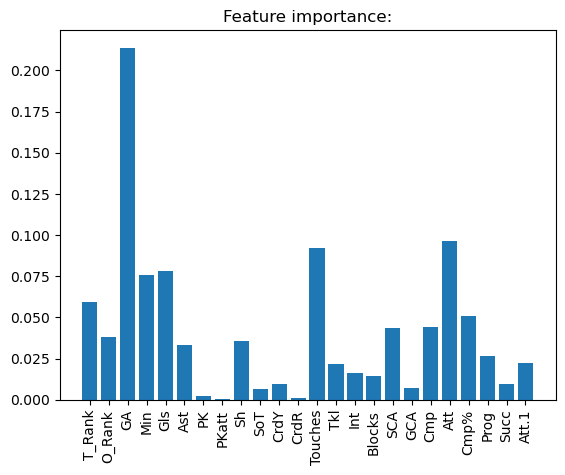

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
# Create the scaler object
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

all_df = pd.read_csv('allDf.csv')
cols = all_df.columns 
all_df = all_df.loc[(all_df[cols[1]] != 0) | (all_df[cols[2]] != 0) | (all_df[cols[3]] != 0) | (all_df[cols[4]] != 0) |(all_df[cols[5]] != 0) |(all_df[cols[7]] != 0) | (all_df[cols[8]] != 0) | (all_df[cols[9]] != 0) |(all_df[cols[10]] != 0) |(all_df[cols[11]] != 0) |(all_df[cols[12]] != 0) |(all_df[cols[13]] != 0) |(all_df[cols[14]] != 0) |(all_df[cols[15]] != 0) |(all_df[cols[16]] != 0) |(all_df[cols[17]] != 0) |(all_df[cols[18]] != 0) |(all_df[cols[19]] != 0) |(all_df[cols[20]] != 0) |(all_df[cols[21]] != 0)|(all_df[cols[22]] != 0)|(all_df[cols[23]] != 0)|(all_df[cols[24]] != 0)]
GK_df = pd.read_csv('gkDf.csv')
def train(df):
    scaler = StandardScaler()

    # Fit the scaler to the DataFrame
    scaler.fit(df)

    # Transform the DataFrame
    df_scaled = scaler.transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    y = df['points']
    X = df_scaled.drop('points',axis=1)


    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create an instance of the RandomForestClassifier
    clf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model to the training data
    clf.fit(X_train, y_train)
    return clf
    
plt.bar(all_df.drop('points',axis=1).columns,train(all_df).feature_importances_)
plt.title('Feature importance:')
plt.xticks(rotation=90)
plt.show()

In [10]:
players_clf = train(all_df)
gk_clf = train(GK_df)

In [ ]:
players = Players()
for i,team_name in enumerate(teams.teams.keys()):
    driver.get('https://fbref.com/en/squads/' + teams.__getitem__(team_name)[0])
    table_team = driver.find_element(By.ID, "stats_standard_9")
    num_rows_team = len(table_team.find_elements(By.XPATH, "//*[@id='stats_standard_9']/tbody/tr"))
    for row in range(2, (num_rows_team + 1)):
        FinalXPath_matches = before_XPath_team + str(row) + aftertd_XPath + str(33) + aftertr_XPath
        FinalXPath_position = before_XPath_team + str(row) + aftertd_XPath + str(2) + aftertr_XPath
        FinalXPath_player = before_XPath_team + str(row) + ']/th'
        player_name = driver.find_element(By.XPATH, FinalXPath_player).text
        flag = False
        player_price = -4
        if player_name and player_name != 'Player':
            count += 1
            if convert_to_english(player_name) in list(players_prices.keys()):
                player_price = float(players_prices[convert_to_english(player_name)])
                flag = True
            elif len(player_name.split(' ')) > 1:
                if convert_to_english(player_name.split(' ')[0]) in list(players_prices.keys()):
                    player_price = float(players_prices[convert_to_english(player_name.split(' ')[0])])
                    flag = True
                elif convert_to_english(player_name.split(' ')[0][0] + '.' + player_name.split(' ')[1]) in list(
                        players_prices.keys()):
                    player_price = float(players_prices[convert_to_english(
                        player_name.split(' ')[0][0] + '.' + player_name.split(' ')[1])])
                    flag = True
                last_name_list = player_name.split(' ')[1:]
                last = ''
                for i, p in enumerate(last_name_list):
                    p = convert_to_english(p)
                    last += p
                    if p in list(players_prices.keys()):
                        player_price = float(players_prices[p])
                        flag = True
                    if i < len(last_name_list) - 1:
                        last += ' '

                if convert_to_english(last) in list(players_prices.keys()):
                    player_price = float(players_prices[convert_to_english(last)])
                    flag = True
            else:
                if convert_to_english(player_name) in list(players_prices.keys()):
                    player_price = float(players_prices[convert_to_english(player_name)])
                    flag = True

        try:
            cur_len = len(driver.find_element(By.XPATH, FinalXPath_matches).get_attribute('innerHTML').split('">'))
        except:
            flag = False
        if cur_len > 1 and flag:
            player_code = \
                driver.find_element(By.XPATH, FinalXPath_matches).get_attribute('innerHTML').split('">')[0].split('/')[
                    3]
            pos = driver.find_element(By.XPATH, FinalXPath_position).text
            if ',' in pos:
                pos = pos.split(',')[0]
            players.add_player(player_name, team_name, pos, player_price, player_code)
            players.add_point(player_name,teams)
            #print(players.get_recent_games(player_name,teams))
            # if pos == 'GK':
            #     GK_list = players.add_games(player_name, GK_list)
            #     print(players.features_names_GK)
            # else:
            #     all_list = players.add_games(player_name, all_list)
            #     print(players.features_names_all)

            # rest = player_c.get_recent_games(teams)
            # players.append([player_name, team_name, pos, player_price, player_code])
    driver.get('https://fbref.com/en/comps/9/Premier-League-Stats')

In [53]:
import ipywidgets as widgets
from IPython.display import display


In [54]:
budget = 100
teamnames_def=[]
teamnames_mid=[]
teamnames_att=[]
playerin=[]
team_players = {}
for team in list(teams.teams.keys()):
    team_players[team] = 0

In [56]:
print('Welcome to your fantasy league, chose your team. The format of the players in name, team, price, expected points according to the model ')

Welcome to your fantasy league, chose your team. The format of the players in name, team, price, expected points according to the model 


In [57]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
gk = [[list(players.players.keys())[i],p[0],p[2],p[-1]] for i,p in enumerate(list(players.players.values())) if p[1] == 'GK'] #and p[-1] != -1]
selected_gk = gk[0].copy()
selected_gk.append(1)
midfielders = []
defenders = []
attackers = []
def dropdown_handler(change):
    global budget
    global selected_gk
    if len(selected_gk) == 4:
        team_players[selected_gk[1]] -= 1
        budget += selected_gk[2]
    team_players[change.new[1]] += 1
    budget -= change.new[2]

    if team_players[change.new[1]] > 2:
        print('Cant choose 3 players for the same team!')
    else:
        
        #myteam.append(selected_gk)
        print("You have chose " +change.new[0]+' and got ' +str(round(budget,2))+" left")
    selected_gk = change.new
    
def filter_list(value):
    global selected_gk
    filtered_list = [x for x in gk if value[0] <= float(x[2]) <= value[1]]
    GK = widgets.Dropdown(
    options=filtered_list,
    description='GK:',
    disabled=False)
    GK.observe(dropdown_handler, names='value')
    display(GK)
    

slider = widgets.IntRangeSlider(min=1, max=15, value=[1, 15])
selected = widgets.interact(filter_list, value=slider)


interactive(children=(IntRangeSlider(value=(1, 15), description='value', max=15, min=1), Output()), _dom_class…

In [58]:
deff = [[list(players.players.keys())[i],p[0],p[2],p[-1]] for i,p in enumerate(list(players.players.values())) if p[1] == 'DF']
def selectMultiple_handler(change):
    global defenders
    global midfielders
    global budget
    global teamnames_mid
    global teamnames_def
    global teamnames_att
    flag = True
    for defender in defenders:
        team_players[defender[1]] -= 1
        budget += defender[2]
    for defender in change['new']:
        team_players[defender[1]] += 1
        if team_players[defender[1]] > 2:
            print('Cant choose 3 players for the same team!')
            flag = False
    if len(attackers) +len(midfielders) + len(defenders)+1 == 11:
        print('There are more 11 players in your team!')
        for p in range (len(defenders)):
            teamnames_def_def.append(defenders[p][0])
            print('your gk is:',selected_gk[0])
            print('your defence is:',teamnames_def)
            print('your midfield is:', teamnames_mid)
            print('your attack is:', teamnames_att)
            flag = False
    budget -= sum([p[2] for p in list(change['new'])])

    if flag:
        if 2 < len(list(change['new'])) < 6:
            
            if budget > 0:
                print('you chose now',list(change['new'])[-1][0])
                print('You chose ' ,len(list(change['new'])),' defenders and you are left with ', round(budget,2))
                teamnames_def.append((change['new'])[-1][0])
            else:
                print('Out of budget!')
        else:
            teamnames_def.append((change['new'])[-1][0])
            print('You chose now',list(change['new'])[-1][0])
            print('You chose ' ,len(list(change['new'])),' defenders which is ilegal amount, you have to chose between 3 and 5')
            if budget > 0:
                print('You are left with ', budget)
            else:
                print('Out of budget!')
    defenders = list(change['new'])


def filter_list(value):
    filtered_list = [x for x in deff if value[0] <= float(x[2]) <= value[1]]
    DEF = widgets.SelectMultiple(
    options=filtered_list,
    description='DEF:',
    disabled=False,
    layout=Layout(display="flex", flex_flow='column'))
    DEF.observe(selectMultiple_handler, names='value')
    display(DEF)
    #return filtered_list

slider = widgets.IntRangeSlider(min=1, max=15, value=[1, 15])
selected = widgets.interact(filter_list, value=slider)

interactive(children=(IntRangeSlider(value=(1, 15), description='value', max=15, min=1), Output()), _dom_class…

In [59]:
mid = [[list(players.players.keys())[i],p[0],p[2],p[-1]] for i,p in enumerate(list(players.players.values())) if p[1] == 'MF']
def selectMultiple_handler(change):
    global midfielders
    global budget
    global teamnames_mid
    global teamnames_def
    global teamnames_att
    flag = True
    for midfielder in midfielders:
        team_players[midfielder[1]] -= 1
        budget += midfielder[2]
    for midfielder in change['new']:
        team_players[midfielder[1]] += 1
        if team_players[midfielder[1]] > 2:
            print('Cant choose 3 players for the same team!')
            flag = False
    if len(attackers) +len(midfielders) + len(defenders)+1 == 11:
        print('There are 11 players in your team!')
        for p in range (len(midfielders)):
            teamnames_mid.append(midfielders[p][0])
            print('your gk is:',selected_gk[0])
            print('your defence is:',teamnames_def)
            print('your midfield is:', teamnames_mid)
            print('your attack is:', teamnames_att)        
            flag = False
    budget -= sum([p[2] for p in list(change['new'])])

    if flag:
        if 2 < len(list(change['new'])) < 6:
            if budget > 0:
                print('you chose now',list(change['new'])[-1][0])
                print('You chose ' ,len(list(change['new'])),' midfielders and you are left with ', round(budget,2))
                teamnames_mid.append((change['new'])[-1][0])
            else:
                print('Out of budget!')
        else:
            teamnames_mid.append((change['new'])[-1][0])
            print('You chose now',list(change['new'])[-1][0])
            print('You chose ' ,len(list(change['new'])),' midfielders which is ilegal amount, you have to chose between 3 and 5')
            if budget > 0:
                print('You are left with ', budget)
            else:
                print('Out of budget!')

    midfielders = list(change['new'])

def filter_list(value):
    filtered_list = [x for x in mid if value[0] <= float(x[2]) <= value[1]]
    MID = widgets.SelectMultiple(
    options=filtered_list,
    description='MID:',
    disabled=False,
    layout=Layout(display="flex", flex_flow='column'))
    MID.observe(selectMultiple_handler, names='value')
    display(MID)
    #return filtered_list

slider = widgets.IntRangeSlider(min=1, max=15, value=[1, 15])
selected = widgets.interact(filter_list, value=slider)

interactive(children=(IntRangeSlider(value=(1, 15), description='value', max=15, min=1), Output()), _dom_class…

In [60]:
att = [[list(players.players.keys())[i],p[0],p[2],p[-1]] for i,p in enumerate(list(players.players.values())) if p[1] == 'FW']
def selectMultiple_handler(change):
    global attackers
    global budget
    global teamnames_mid
    global teamnames_def
    global teamnames_att
    flag = True
    for attacker in attackers:
        team_players[attacker[1]] -= 1
        budget += attacker[2]
    for attacker in change['new']:
        team_players[attacker[1]] += 1
        if team_players[attacker[1]] > 2:
            print('Cant choose 3 players for the same team!')
            budget -= attacker[2]
            flag = False
    if len(attackers) +len(midfielders) + len(defenders)+1 == 10:
        teamnames_att.append((change['new'])[-1][0])
        print('you chose now',list(change['new'])[-1][0])
        print('There are 11 players in your team:')
        print('your gk is:',selected_gk[0])
        print('your defence is:',teamnames_def)
        print('your midfield is:', teamnames_mid)
        print('your attack is:', teamnames_att)
        flag = False
    budget -= sum([p[2] for p in list(change['new'])])

    if flag:
        if 0 < len(list(change['new'])) < 4:
            if budget > 0:
                print('you chose now',list(change['new'])[-1][0])
                print('You chose ' ,len(list(change['new'])),' attackers and you are left with ', round(budget,2))
                teamnames_att.append((change['new'])[-1][0])
            else:
                print('Out of budget!')
        else:
            teamnames_att.append((change['new'])[-1][0])
            print('You chose now',list(change['new'])[-1][0])
            print('You chose ' ,len(list(change['new'])),' attackers which is ilegal amount, you have to chose between 1 and 3')
            if budget > 0:
                print('You are left with ', budget)
                
            else:
                print('Out of budget!')
    attackers = list(change['new'])




def filter_list(value):
    filtered_list = [x for x in att if value[0] <= float(x[2]) <= value[1]]
    ATT = widgets.SelectMultiple(
    options=filtered_list,
    description='ATT:',
    disabled=False,
    layout=Layout(display="flex", flex_flow='column'))
    ATT.observe(selectMultiple_handler, names='value')
    display(ATT)
    #return filtered_list

slider = widgets.IntRangeSlider(min=1, max=15, value=[1, 15])
selected = widgets.interact(filter_list, value=slider)

interactive(children=(IntRangeSlider(value=(1, 15), description='value', max=15, min=1), Output()), _dom_class…

In [61]:

def swap (defenders, midfielders, attackers, budget):
    budget=0
    myteam=[]
    myteam.extend(defenders)
    myteam.extend(midfielders)
    myteam.extend(attackers)
    myteam.sort(key=lambda x: x[-1])
    three_lowest=myteam[:3]
    for i in range(3):
        budget+= three_lowest[i][2]
    
    print('We recommend you replacing these players: ',three_lowest[0][0],',',three_lowest[1][0],',',three_lowest[2][0])
    print('thier predicted points is',round((three_lowest[0][3]+three_lowest[1][3]+three_lowest[2][3]),2),'now your budget is',round(budget,2)) 
    pos_needed=[]
    for i in range(len(three_lowest)):
        pos_needed.append(players.__getitem__(three_lowest[i][0])[1])
    highest_val=three_lowest[0][3]+three_lowest[1][3]+three_lowest[2][3]
    global playerin
    global deff
    global mid
    mid= mid[:-1]
    deff=deff[:-1]
    if pos_needed[0] == 'DF':
        for d in deff:
            if team_players[d[1]]<=1:
                if d not in myteam and d not in playerin:
                    if pos_needed[1] =='DF':
                        for d1 in deff:
                            if team_players[d1[1]]==0 or (team_players[d1[1]]==1 and team_players[d1[1]] != team_players[d[1]]):
                                if d1 not in myteam and d1 !=d:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[d[1]] or (team_players[d2[1]] != team_players[d1[1]] ))):
                                                if d2 not in myteam and d2 != d1 and d2 != d:
                                                    if (d[2]+d1[2]+d2[2])<= budget:
                                                         if (d[3]+d1[3]+d2[3])> highest_val:
                                                            highest_val= d[3]+d1[3]+d2[3]
                                                            playerin = [d,d1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[d[1]] or (team_players[m2[1]] != team_players[d1[1]] ))):
                                                if m2 not in myteam and m2 != d1 and m2 != d:
                                                    if (d[2]+d1[2]+m2[2])<= budget:
                                                        if (d[3]+d1[3]+m2[3])> highest_val:
                                                            highest_val= d[3]+d1[3]+m2[3]
                                                            playerin = [d,d1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[d[1]] or (team_players[f2[1]] != team_players[d1[1]] ))):
                                                if f2 not in myteam and f2 != d1 and f2 != d:
                                                    if (d[2]+d1[2]+f2[2])<= budget:
                                                        if (d[3]+d1[3]+f2[3])> highest_val:
                                                            highest_val= d[3]+d1[3]+f2[3]
                                                            playerin = [d,d1,f2]

                    if pos_needed[1]=='MF':
                        for m1 in mid:
                            if team_players[m1[1]]==0 or ( team_players[m1[1]]==1 and team_players[m1[1]] != team_players[d[1]]):
                                if m1 not in myteam and m1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[d[1]] or (team_players[d2[1]] != team_players[m1[1]] ))):
                                                if d2 not in myteam and d2 != m1 and d2 != d:
                                                    if (d[2]+m1[2]+d2[2])<= budget:
                                                        if (d[3]+m1[3]+d2[3])> highest_val:
                                                            highest_val= d[3]+m1[3]+d2[3]
                                                            playerin = [d,m1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[d[1]] or (team_players[m2[1]] != team_players[m1[1]] ))):
                                                if m2 not in myteam and m2 != m1 and m2 != d:
                                                    if (d[2]+m1[2]+m2[2])<= budget:
                                                        if (d[3]+m1[3]+m2[3])> highest_val:
                                                            highest_val= d[3]+m1[3]+m2[3]
                                                            playerin = [d,m1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[d[1]] or (team_players[f2[1]] != team_players[m1[1]]))):
                                                if f2 not in myteam and f2 != m1 and f2 != d:
                                                    if (d[2]+m1[2]+f2[2])<= budget:
                                                        if (d[3]+m1[3]+f2[3])> highest_val:
                                                            highest_val= d[3]+m1[3]+f2[3]
                                                            playerin = [d,m1,f2]

                    if pos_needed[1]=='FW':
                         for f1 in att[:-1]:
                            if team_players[f1[1]]==0 or ( team_players[f1[1]]==1 and team_players[f1[1]] != team_players[d[1]]):    
                                if f1 not in myteam and f1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[d[1]] or (team_players[d2[1]] != team_players[f1[1]]))):
                                                if d2 not in myteam and d2 != f1 and d2 != d:
                                                    if (d[2]+f1[2]+d2[2])<= budget:
                                                        if (d[3]+f1[3]+d2[3])> highest_val:
                                                            highest_val= d[3]+f1[3]+d2[3]
                                                            playerin = [d,f1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[d[1]] or (team_players[m2[1]] != team_players[f1[1]]))):
                                                if m2 not in myteam and m2 != f1 and m2 != d:
                                                    if (d[2]+f1[2]+m2[2])<= budget:
                                                        if (d[3]+f1[3]+m2[3])> highest_val:
                                                            highest_val= d[3]+f1[3]+m2[3]
                                                            playerin = [d,f1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[d[1]] or (team_players[f2[1]] != team_players[f1[1]]))):
                                                if f2 not in myteam and f2 != f1 and f2 != d:
                                                    if (d[2]+f1[2]+f2[2])<= budget:
                                                        if (d[3]+f1[3]+f2[3])> highest_val:
                                                            highest_val= d[3]+f1[3]+f2[3]
                                                            playerin = [d,f1,f2]

    if pos_needed[0] == 'MF':
        for m in mid:
            if team_players[m[1]]<=1:
                if m not in myteam and m not in playerin:
                    if pos_needed[1] =='DF':
                        for d1 in deff:
                            if team_players[d1[1]]==0 or ( team_players[d1[1]]==1 and team_players[d1[1]] != team_players[m[1]]):
                                if d1 not in myteam and d1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[m[1]] or (team_players[d2[1]] != team_players[d1[1]] ))):
                                                if d2 not in myteam and d2 != d1 and d2 != m:
                                                    if (m[2]+d1[2]+d2[2])<= budget:
                                                        if (m[3]+d1[3]+d2[3])> highest_val:
                                                            highest_val= m[3]+d1[3]+d2[3]
                                                            playerin = [m,d1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[m[1]] or (team_players[m2[1]] != team_players[d1[1]] ))):
                                                if m2 not in myteam and m2 != d1 and m2 != m:
                                                    if (m[2]+d1[2]+m2[2])<= budget:
                                                        if (m[3]+d1[3]+m2[3])> highest_val:
                                                            highest_val= m[3]+d1[3]+m2[3]
                                                            playerin = [m,d1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[m[1]] or (team_players[f2[1]] != team_players[d1[1]] ))):
                                                if f2 not in myteam and f2 != d1 and f2 != m:
                                                    if (m[2]+d1[2]+f2[2])<= budget:
                                                        if (m[3]+d1[3]+f2[3])> highest_val:
                                                            highest_val= m[3]+d1[3]+f2[3]
                                                            playerin = [m,d1,f2]

                    if pos_needed[1]=='MF':
                        for m1 in mid:
                            if team_players[m1[1]]==0 or ( team_players[m1[1]]==1 and team_players[m1[1]] != team_players[m[1]]):
                                if m1 not in myteam and m1 != m:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[m[1]] or (team_players[d2[1]] != team_players[m1[1]] ))):
                                                if d2 not in myteam and d2 != m1 and d2 != m:
                                                    if (m[2]+m1[2]+d2[2])<= budget:
                                                        if (m[3]+m1[3]+d2[3])> highest_val:
                                                            highest_val= m[3]+m1[3]+d2[3]
                                                            playerin = [m,m1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[m[1]] or (team_players[m2[1]] != team_players[m1[1]] ))):
                                                if m2 not in myteam and m2 != m1 and m2 != m:
                                                    if (d[2]+m1[2]+m2[2])<= budget:
                                                        if (m[3]+m1[3]+m2[3])> highest_val:
                                                            highest_val= m[3]+m1[3]+m2[3]
                                                            playerin = [m,m1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[m[1]] or (team_players[f2[1]] != team_players[m1[1]] ))):
                                                if f2 not in myteam and f2 != m1 and f2 != m:
                                                    if (m[2]+m1[2]+f2[2])<= budget:
                                                        if (m[3]+m1[3]+f2[3])> highest_val:
                                                            highest_val= m[3]+m1[3]+f2[3]
                                                            playerin = [m,m1,f2]

                    if pos_needed[1]=='FW':
                         for f1 in att[:-1]:
                            if team_players[f1[1]]==0 or ( team_players[f1[1]]==1 and team_players[f1[1]] != team_players[m[1]]):
                                if f1 not in myteam and f1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or (team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[m[1]] or (team_players[d2[1]] != team_players[f1[1]] ))):
                                                if d2 not in myteam and d2 != f1 and d2 != m:
                                                    if (m[2]+f1[2]+d2[2])<= budget:
                                                        if (m[3]+f1[3]+d2[3])> highest_val:
                                                            highest_val= m[3]+f1[3]+d2[3]
                                                            playerin = [m,f1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[m[1]] or (team_players[m2[1]] != team_players[f1[1]] ))):
                                                if m2 not in myteam and m2 != f1 and m2 != m:
                                                    if (m[2]+f1[2]+m2[2])<= budget:
                                                        if (m[3]+f1[3]+m2[3])> highest_val:
                                                            highest_val= m[3]+f1[3]+m2[3]
                                                            playerin = [m,f1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[m[1]] or (team_players[f2[1]] != team_players[f1[1]] ))):
                                                if f2 not in myteam and f2 != f1 and f2 != m:
                                                    if (m[2]+f1[2]+f2[2])<= budget:
                                                        if (m[3]+f1[3]+f2[3])> highest_val:
                                                            highest_val= m[3]+f1[3]+f2[3]
                                                            playerin = [m,f1,f2]

    if pos_needed[0] == 'FW':
        for f in att[:-1]:
            if team_players[f[1]]<=1:
                if f not in myteam and f not in playerin:
                    if pos_needed[1] =='DF':
                        for d1 in deff:
                            if team_players[d1[1]]==0 or ( team_players[d1[1]]==1 and team_players[d1[1]] != team_players[f[1]]):
                                if d1 not in myteam and d1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or (team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[f[1]] or (team_players[d2[1]] != team_players[d1[1]] ))):
                                                if d2 not in myteam and d2 != d1 and d2 != f:
                                                    if (f[2]+d1[2]+d2[2])<= budget:
                                                        if (f[3]+d1[3]+d2[3])> highest_val:
                                                            highest_val= f[3]+d1[3]+d2[3]
                                                            playerin = [f,d1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or (team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[f[1]] or (team_players[m2[1]] != team_players[d1[1]] ))):
                                                if m2 not in myteam and m2 != d1 and m2 != f:
                                                    if (f[2]+d1[2]+m2[2])<= budget:
                                                        if (f[3]+d1[3]+m2[3])> highest_val:
                                                            highest_val= f[3]+d1[3]+m2[3]
                                                            playerin = [f,d1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or (team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[f[1]] or (team_players[f2[1]] != team_players[d1[1]] ))):
                                                if f2 not in myteam and f2 != d1 and f2 != f:
                                                    if (f[2]+d1[2]+f2[2])<= budget:
                                                        if (f[3]+d1[3]+f2[3])> highest_val:
                                                            highest_val= f[3]+d1[3]+f2[3]
                                                            playerin = [f,d1,f2]

                    if pos_needed[1]=='MF':
                        for m1 in mid:
                            if team_players[m1[1]]==0 or (team_players[m1[1]]==1 and team_players[m1[1]] != team_players[f[1]]):
                                if m1 not in myteam and m1 not in playerin:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or ( team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[f[1]] or (team_players[d2[1]] != team_players[m1[1]] ))):
                                                if d2 not in myteam and d2 != m1 and d2 != f:
                                                    if (f[2]+m1[2]+d2[2])<= budget:
                                                        if (f[3]+m1[3]+d2[3])> highest_val:
                                                            highest_val= f[3]+m1[3]+d2[3]
                                                            playerin = [f,m1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[f[1]] or (team_players[m2[1]] != team_players[m1[1]] ))):
                                                if m2 not in myteam and m2 != m1 and m2 != f:
                                                    if (f[2]+m1[2]+m2[2])<= budget:
                                                        if (f[3]+m1[3]+m2[3])> highest_val:
                                                            highest_val= f[3]+m1[3]+m2[3]
                                                            playerin = [f,m1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[f[1]] or (team_players[f2[1]] != team_players[m1[1]] ))):
                                                if f2 not in myteam and f2 != m1 and f2 != f:
                                                    if (f[2]+m1[2]+f2[2])<= budget:
                                                        if (f[3]+m1[3]+f2[3])> highest_val:
                                                            highest_val= f[3]+m1[3]+f2[3]
                                                            playerin = [f,m1,f2]

                    if pos_needed[1]=='FW':
                         for f1 in att[:-1]:
                            if team_players[f1[1]]==0 or ( team_players[f1[1]]==1 and team_players[f1[1]] != team_players[f[1]]):
                                if f1 not in myteam and f1 != f:
                                    if pos_needed[2] =='DF':
                                        for d2 in deff:
                                            if team_players[d2[1]]==0 or (team_players[d2[1]]==1 and (team_players[d2[1]] != team_players[f[1]] or (team_players[d2[1]] != team_players[f1[1]] ))):
                                                if d2 not in myteam and d2 != f1 and d2 != f:
                                                    if (f[2]+f1[2]+d2[2])<= budget:
                                                        if (f[3]+f1[3]+d2[3])> highest_val:
                                                            highest_val= f[3]+f1[3]+d2[3]
                                                            playerin = [f,f1,d2]

                                    if pos_needed[2] =='MF':
                                        for m2 in mid:
                                            if team_players[m2[1]]==0 or ( team_players[m2[1]]==1 and (team_players[m2[1]] != team_players[f[1]] or (team_players[m2[1]] != team_players[f1[1]] ))):
                                                if m2 not in myteam and m2 != f1 and m2 != f:
                                                    if (f[2]+f1[2]+m2[2])<= budget:
                                                        if (f[3]+f1[3]+m2[3])> highest_val:
                                                            highest_val= f[3]+f1[3]+m2[3]
                                                            playerin = [f,f1,m2]

                                    if pos_needed[2] =='FW':
                                        for f2 in att[:-1]:
                                            if team_players[f2[1]]==0 or ( team_players[f2[1]]==1 and (team_players[f2[1]] != team_players[f[1]] or (team_players[f2[1]] != team_players[f1[1]] ))):
                                                if f2 not in myteam and f2 != f1 and f2 != f:
                                                    if (f[2]+f1[2]+f2[2])<= budget:
                                                        if (f[3]+f1[3]+f2[3])> highest_val:
                                                            highest_val= f[3]+f1[3]+f2[3]
                                                            playerin = [f,f1,f2]
    budget-= (playerin[0][2]+playerin[1][2]+playerin[2][2])
    print('and replacing them by:',playerin[0][0],',',playerin[1][0],',',playerin[2][0])
    print('and their preditced points is ',round(highest_val,2),'and your budget now is ',round(budget,2))

In [62]:
print('your gk is:',selected_gk[0])
print('your defence is:',teamnames_def)
print('your midfield is:', teamnames_mid)
print('your attack is:', teamnames_att)
swap(defenders,midfielders, attackers, budget)
myteamnames=[]
myteamnames.append(selected_gk[0])
myteamnames.extend(teamnames_def)
myteamnames.extend(teamnames_mid)
myteamnames.extend(teamnames_att)
myteam=[]
myteam.extend(defenders)
myteam.extend(midfielders)
myteam.extend(attackers)
myteam.sort(key=lambda x: x[-1])
three_lowest=myteam[:3]
button = widgets.Button(description='replace')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        myteamnames.remove(three_lowest[0][0])
        myteamnames.remove(three_lowest[1][0])
        myteamnames.remove(three_lowest[2][0])
        myteamnames.append(playerin[0][0])
        myteamnames.append(playerin[1][0])
        myteamnames.append(playerin[2][0])
        print('your team now is:')
        print(myteamnames)
display(button, out)
button.on_click(on_button_clicked)

your gk is: Emiliano Martínez
your defence is: ['Oleksandr Zinchenko', 'João Cancelo', 'Lisandro Martínez', 'Emerson']
your midfield is: ['Kevin De Bruyne', 'Bruno Guimarães', 'Alexis Mac Allister', 'Mateo Kovačić']
your attack is: ['Ivan Toney', 'Harry Wilson']
We recommend you replacing these players:  João Cancelo , Alexis Mac Allister , Ivan Toney
thier predicted points is 2.19 now your budget is 20.2
and replacing them by: Matt Targett , Tomáš Souček , Adama Traoré
and their preditced points is  5.33 and your budget now is  5.5


Button(description='replace', style=ButtonStyle())

Output()